In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

# TFT-SSP3모델 시각화

In [4]:
all_df = pd.read_csv("../data/all_cities_month_temp_df.csv")
all_df = all_df.loc[all_df['DateTime'] >= '1880-01-01']
display(all_df)

,year,month,Monthly Anamoly,Monthly Unc.,city_num,DateTime
726,1880,1,-5.194,0.870,0,1880-01-01
727,1880,2,-1.075,1.727,0,1880-02-01
728,1880,3,4.233,0.917,0,1880-03-01
729,1880,4,9.538,0.978,0,1880-04-01
730,1880,5,15.957,1.034,0,1880-05-01
...,...,...,...,...,...,...
12059,2020,8,28.999,0.220,4,2020-08-01
12060,2020,9,28.836,0.278,4,2020-09-01
12061,2020,10,26.535,0.207,4,2020-10-01
12062,2020,11,27.341,0.290,4,2020-11-01


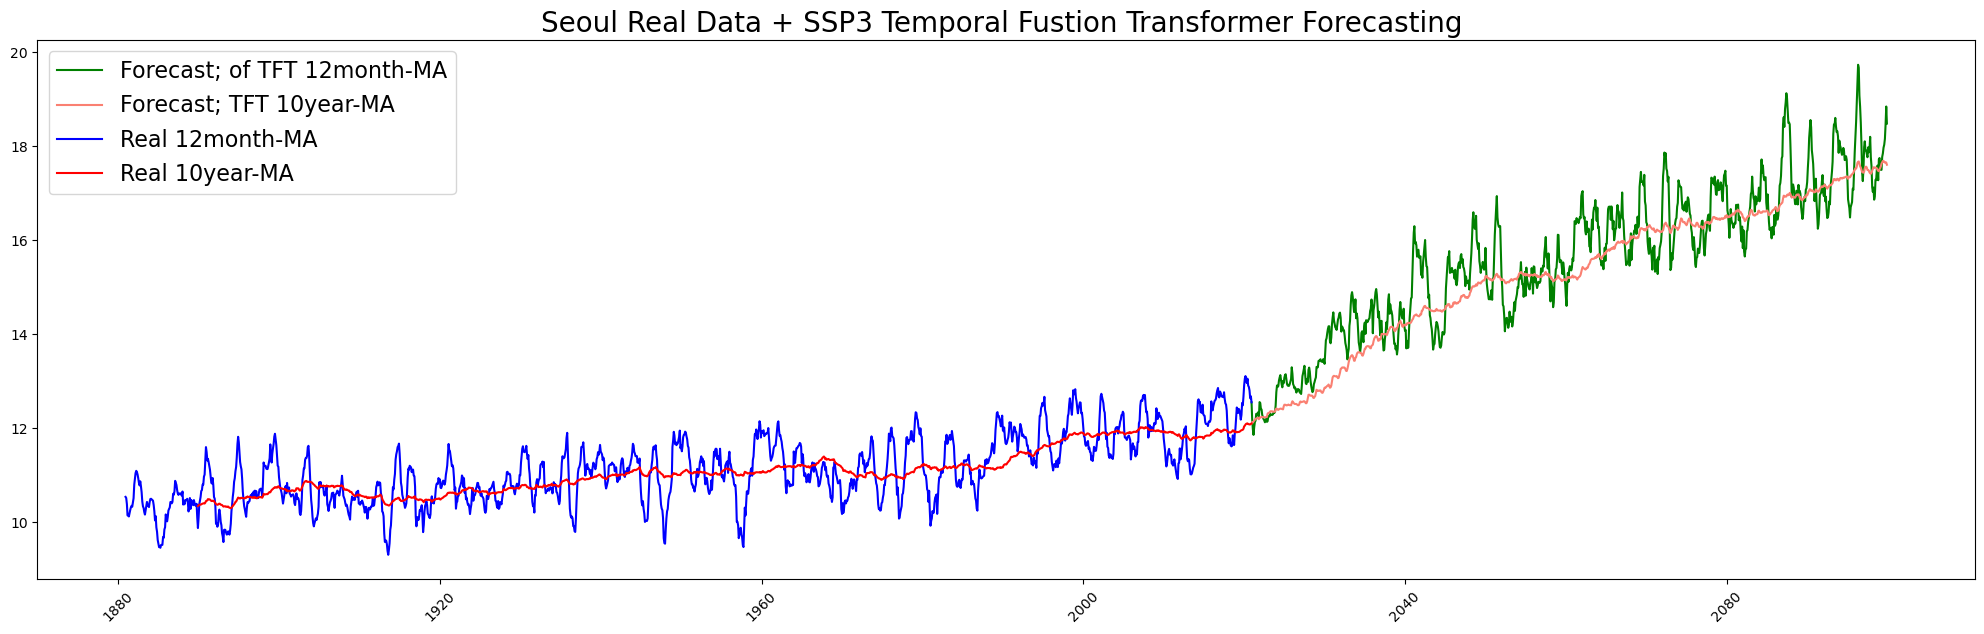

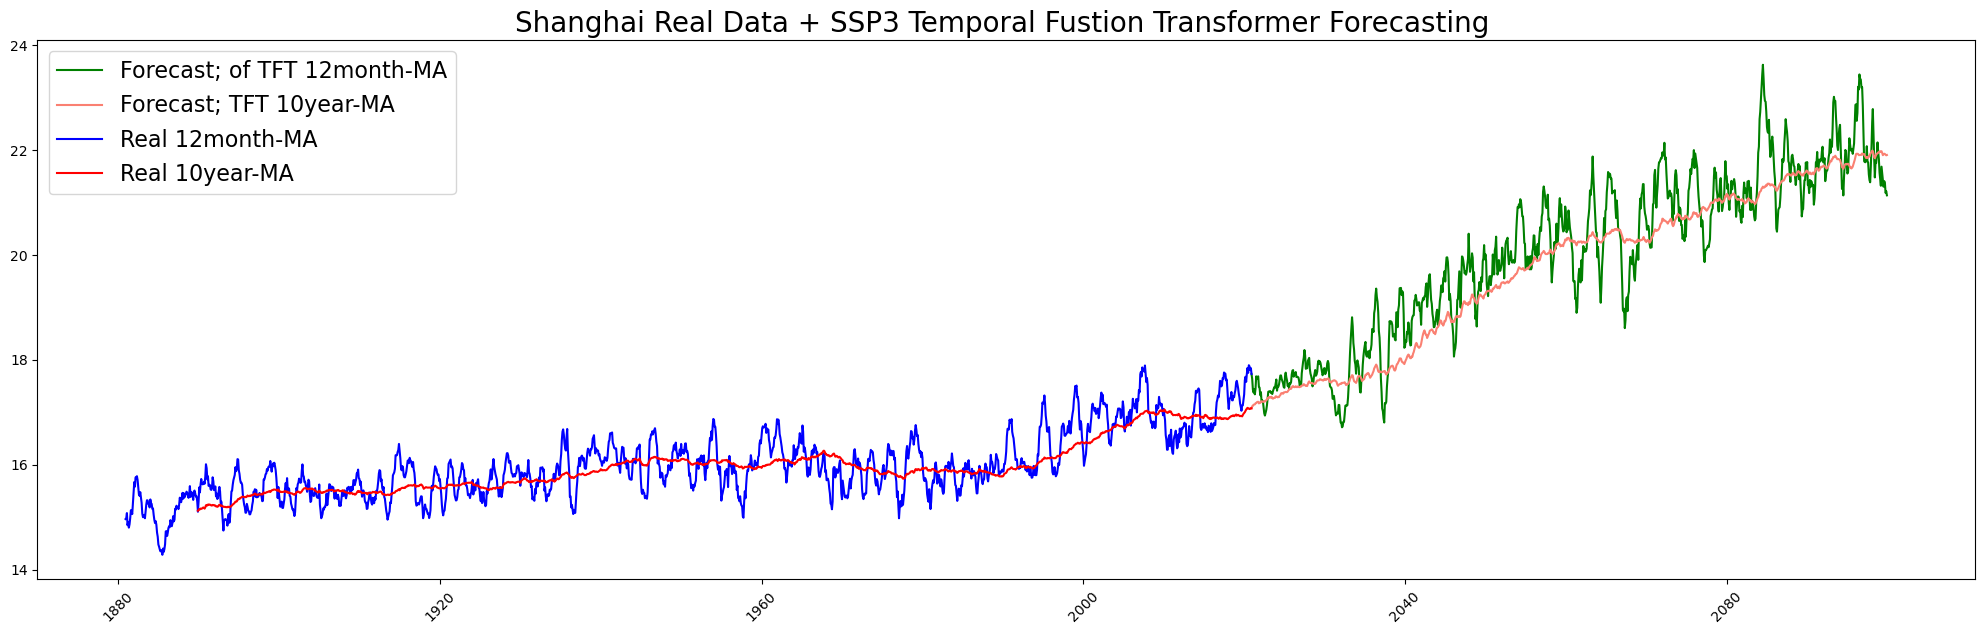

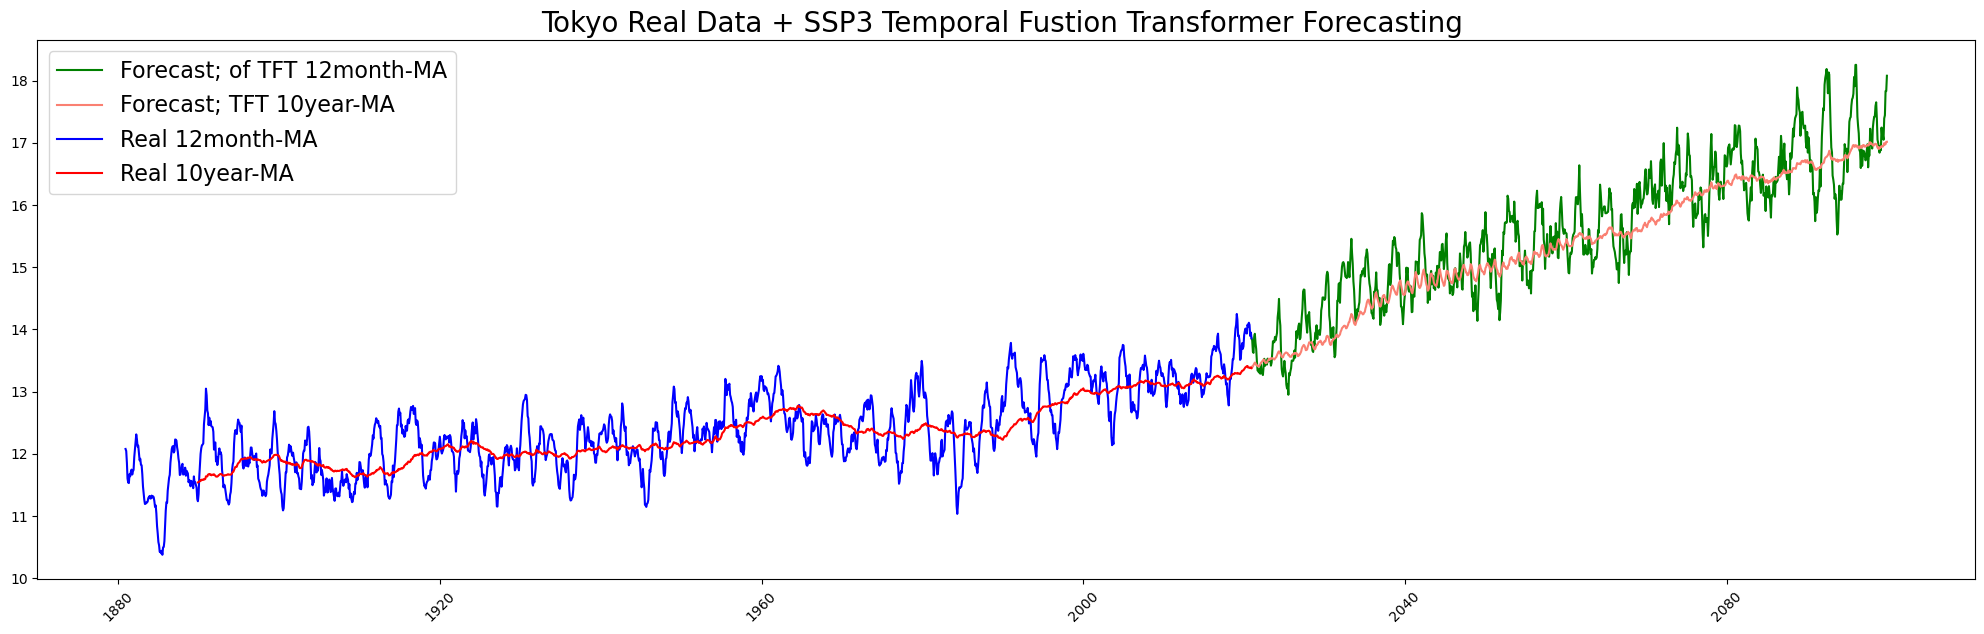

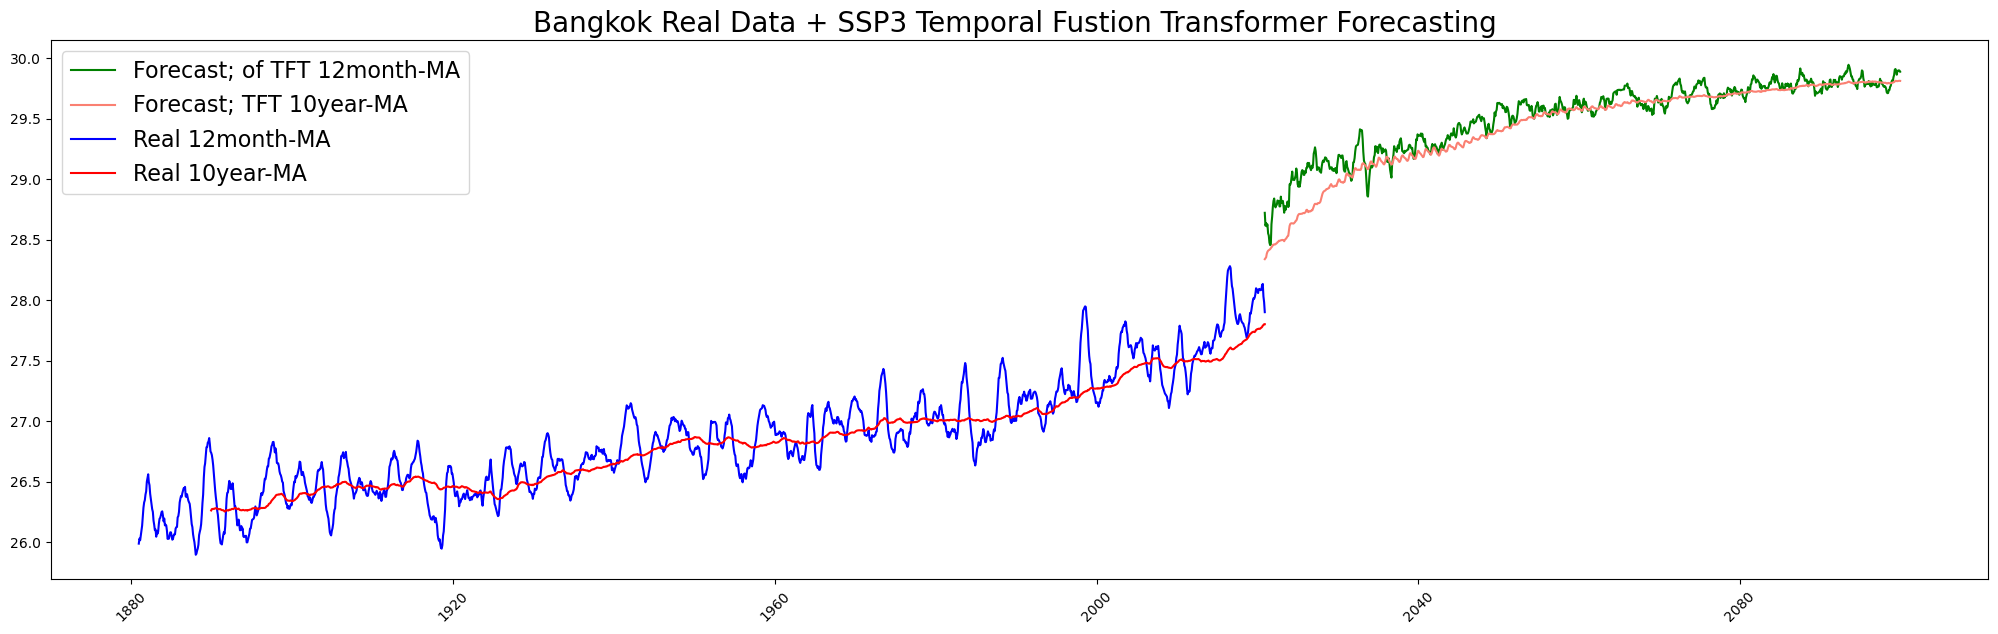

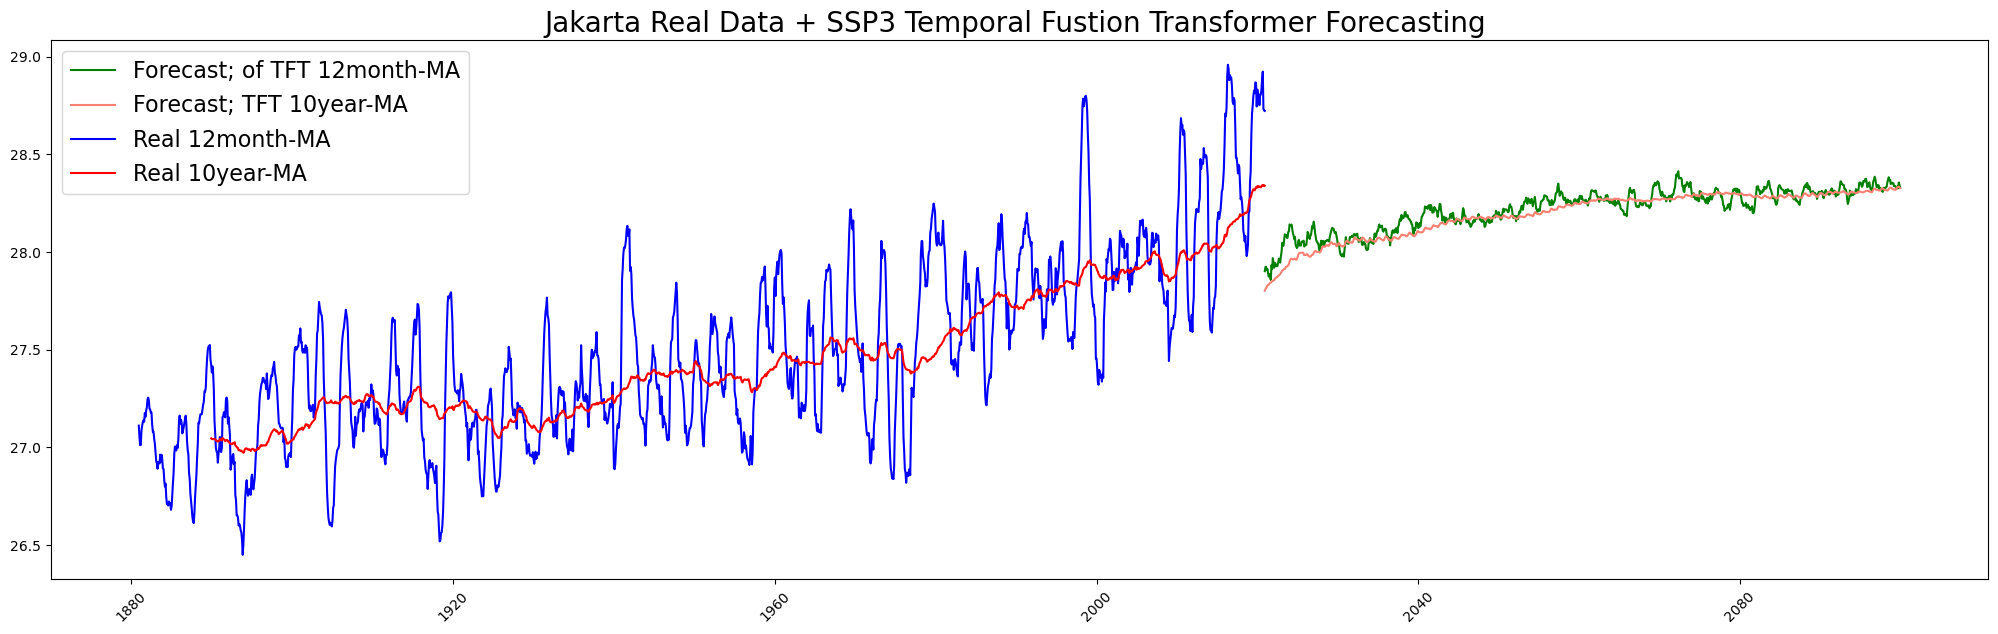

In [5]:
city_names = ['Seoul', 'Shanghai', 'Tokyo', 'Bangkok', 'Jakarta']

for city in city_names:
    tft_df = pd.read_csv(f"../TFT_model/SSP3/TFT_SSP3_forecast/tft_ssp3_{city}.csv")[['DateTime', 'Monthly Anamoly']]
    tft_df["DateTime"] = pd.to_datetime(tft_df.loc[:,"DateTime"])

    nbeats_month12_ma = tft_df["Monthly Anamoly"].rolling(window=12).mean()
    nbeats_year10_ma = tft_df["Monthly Anamoly"].rolling(window=120).mean()

    x = pd.to_datetime(tft_df.loc[:,"DateTime"])
    index_20201201 = tft_df.loc[tft_df.loc[:,'DateTime']=='2020-12-01'].index.values[0]

    # plt.rcParams['figure.figsize'] = [20, 7]
    # plt.plot(x,nbeats_month12_ma[:], label="12-month moving average")
    # plt.plot(x,nbeats_year10_ma[:], color='red', label="10-year moving average")
    # plt.xticks(rotation=45)
    # plt.title(f"{city}'s Transformer Model Moving Average")
    # plt.legend()
    # plt.show()

    month_temp_df = all_df.loc[all_df.loc[:,"city_num"] == city_names.index(f"{city}")]
    real_data_x = pd.to_datetime(month_temp_df["DateTime"])

    month12_ma = month_temp_df["Monthly Anamoly"].rolling(window=12).mean()
    year10_ma = month_temp_df["Monthly Anamoly"].rolling(window=120).mean()

    plt.rcParams['figure.figsize'] = [25, 7]
    plt.plot(x,[None for city in range(index_20201201)]+nbeats_month12_ma[index_20201201:].to_list(), label='Forecast; of TFT 12month-MA', color='green')
    plt.plot(x,[None for city in range(index_20201201)]+nbeats_year10_ma[index_20201201:].to_list(), label='Forecast; TFT 10year-MA', color='salmon')
    plt.plot(real_data_x, month12_ma.to_list() + [None for city in range(real_data_x.count()-(index_20201201+1))], color = 'blue', label='Real 12month-MA')
    plt.plot(real_data_x, year10_ma.to_list() + [None for city in range(real_data_x.count()-(index_20201201+1))], color='red', label='Real 10year-MA')

    # plt.vlines(pd.to_datetime('2020-12'), ymin=5, ymax=25, color='black')
    # plt.xlim([pd.to_datetime('1819-07'), pd.to_datetime('2100-12')])
    # if(nbeats_month12_ma.min() >= 25):
    #     plt.ylim([25,30])
    # else:
    #     plt.ylim([8,25])
    plt.xticks(rotation=45)
    plt.title(f"{city} Real Data + SSP3 Temporal Fustion Transformer Forecasting ", fontsize=20)
    plt.legend(prop={'size': 16})
    plt.show()

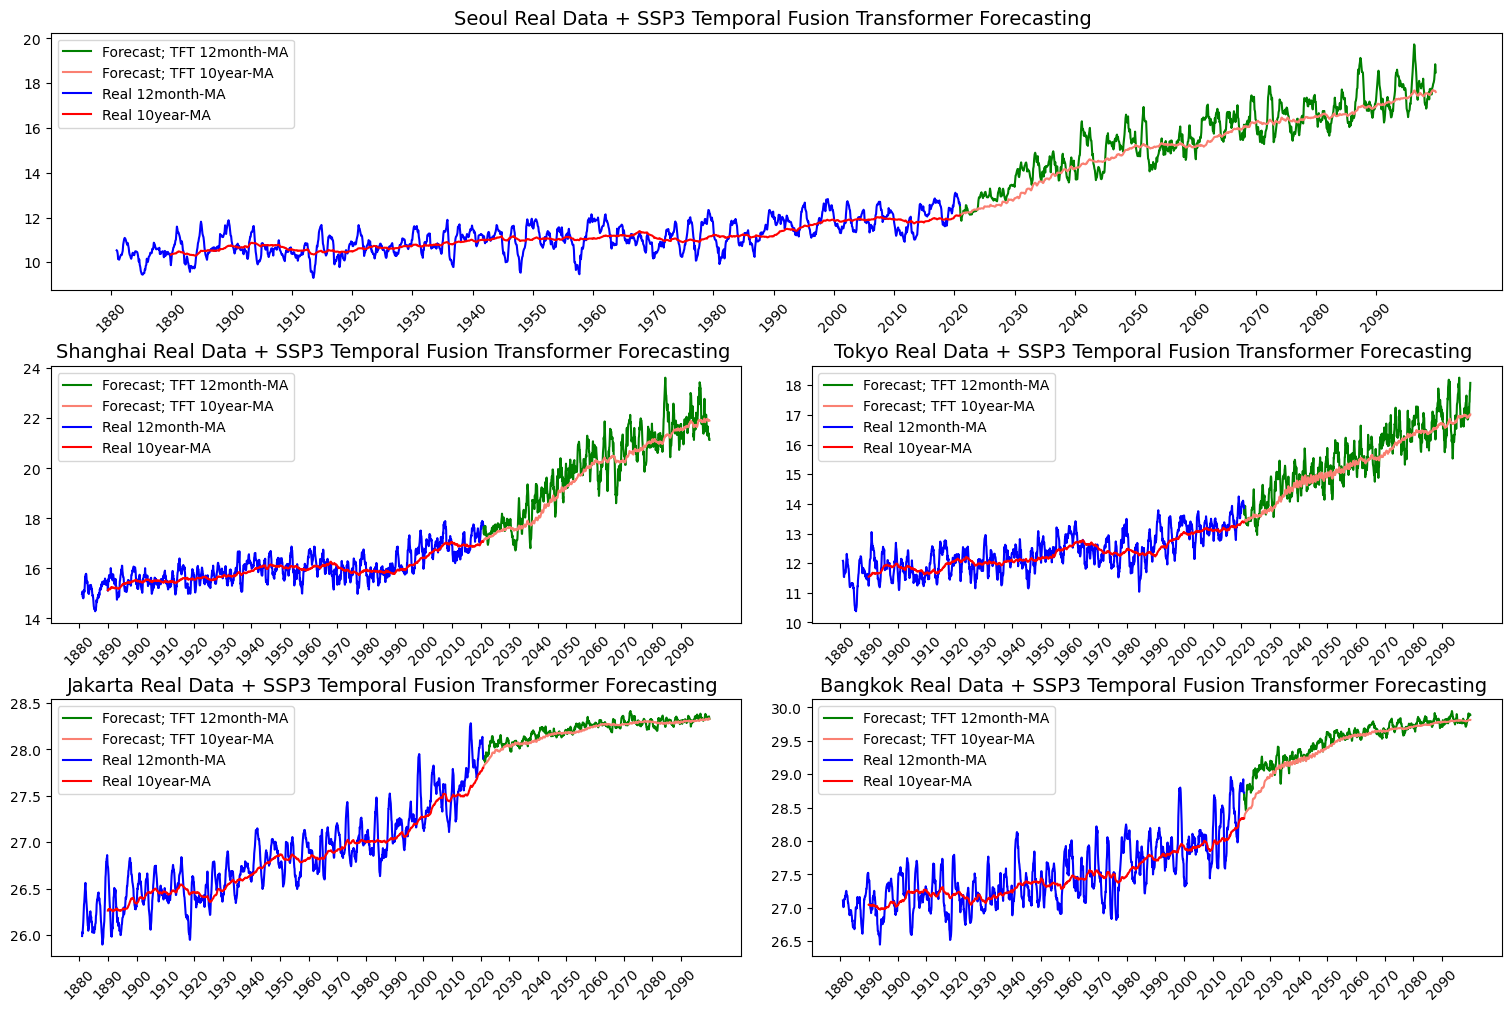

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

city_names = ['Seoul', 'Shanghai', 'Tokyo','Jakarta', 'Bangkok']

fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = gridspec.GridSpec(3, 2, figure=fig)

for i, city in enumerate(city_names):
    tft_df = pd.read_csv(f"../TFT_model/SSP3/TFT_SSP3_forecast/tft_ssp3_{city}.csv")[['DateTime', 'Monthly Anamoly']]
    tft_df["DateTime"] = pd.to_datetime(tft_df["DateTime"])

    nbeats_month12_ma = tft_df["Monthly Anamoly"].rolling(window=12).mean()
    nbeats_year10_ma = tft_df["Monthly Anamoly"].rolling(window=120).mean()

    x = tft_df["DateTime"]
    index_20201201 = tft_df[tft_df["DateTime"] == '2020-12-01'].index[0]

    month_temp_df = all_df[all_df["city_num"] == city_names.index(city)]
    real_data_x = pd.to_datetime(month_temp_df["DateTime"])

    month12_ma = month_temp_df["Monthly Anamoly"].rolling(window=12).mean()
    year10_ma = month_temp_df["Monthly Anamoly"].rolling(window=120).mean()

    if i == 0:
        ax = fig.add_subplot(gs[0, :])
    else:
        ax = fig.add_subplot(gs[(i-1) // 2 + 1, (i-1) % 2])

    ax.plot(x, [None for _ in range(index_20201201)] + nbeats_month12_ma[index_20201201:].to_list(), label='Forecast; TFT 12month-MA', color='green')
    ax.plot(x, [None for _ in range(index_20201201)] + nbeats_year10_ma[index_20201201:].to_list(), label='Forecast; TFT 10year-MA', color='salmon')
    ax.plot(real_data_x, month12_ma.to_list() + [None for _ in range(len(real_data_x)-(index_20201201+1))], color='blue', label='Real 12month-MA')
    ax.plot(real_data_x, year10_ma.to_list() + [None for _ in range(len(real_data_x)-(index_20201201+1))], color='red', label='Real 10year-MA')

    ax.set_xticks(x[::120])
    ax.set_xticklabels(x.dt.strftime('%Y')[::120], rotation=45)
    ax.set_title(f"{city} Real Data + SSP3 Temporal Fusion Transformer Forecasting ", fontsize=14)
    ax.legend(prop={'size': 10})

plt.show()

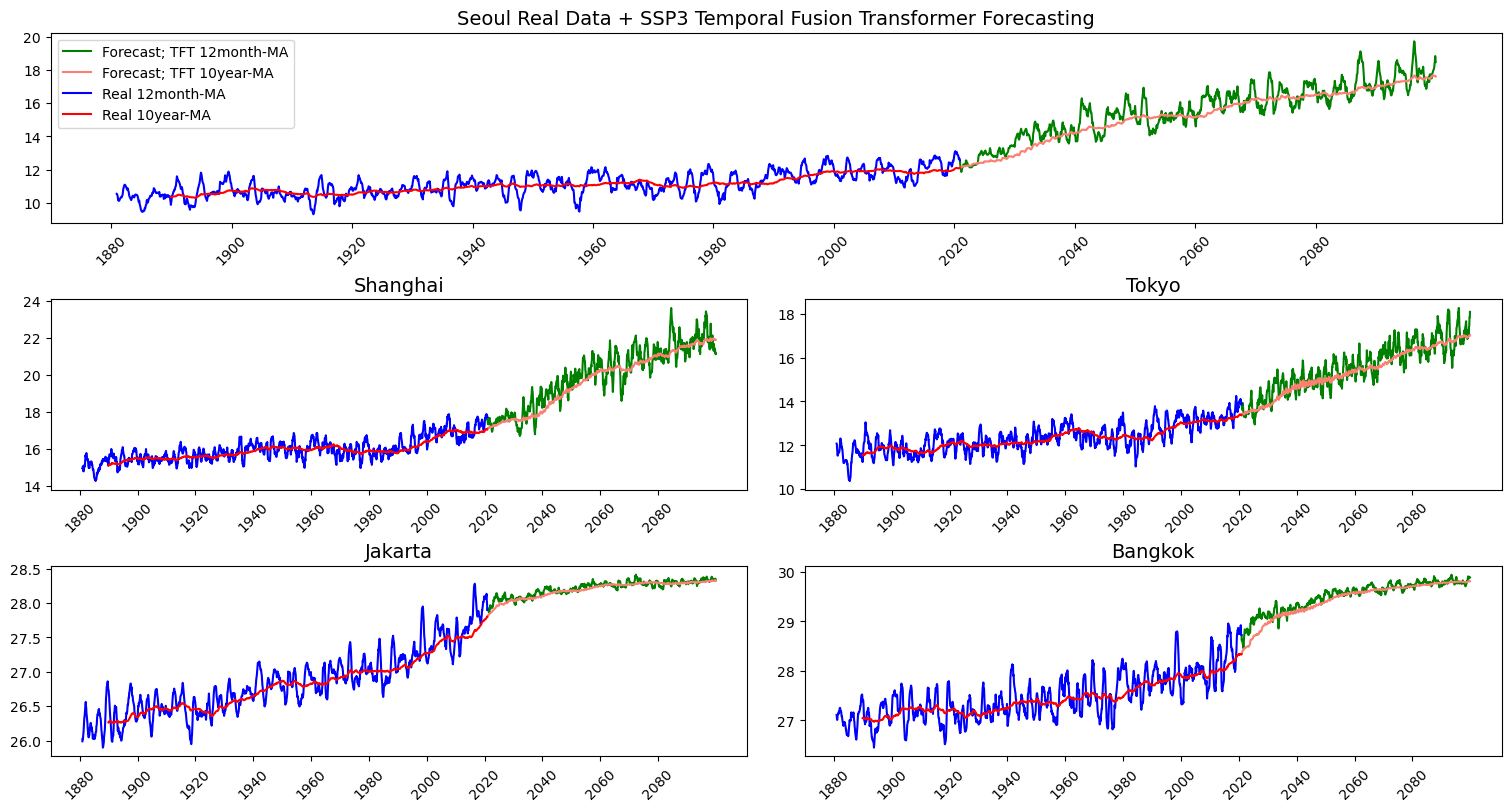

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

city_names = ['Seoul', 'Shanghai', 'Tokyo', 'Jakarta',  'Bangkok']

fig = plt.figure(constrained_layout=True, figsize=(15, 8))
gs = gridspec.GridSpec(3, 2, figure=fig)

for i, city in enumerate(city_names):
    tft_df = pd.read_csv(f"../TFT_model/SSP3/TFT_SSP3_forecast/tft_ssp3_{city}.csv")[['DateTime', 'Monthly Anamoly']]
    tft_df["DateTime"] = pd.to_datetime(tft_df["DateTime"])

    nbeats_month12_ma = tft_df["Monthly Anamoly"].rolling(window=12).mean()
    nbeats_year10_ma = tft_df["Monthly Anamoly"].rolling(window=120).mean()

    x = tft_df["DateTime"]
    index_20201201 = tft_df[tft_df["DateTime"] == '2020-12-01'].index[0]

    month_temp_df = all_df[all_df["city_num"] == city_names.index(city)]
    real_data_x = pd.to_datetime(month_temp_df["DateTime"])

    month12_ma = month_temp_df["Monthly Anamoly"].rolling(window=12).mean()
    year10_ma = month_temp_df["Monthly Anamoly"].rolling(window=120).mean()

    if i == 0:
        ax = fig.add_subplot(gs[0, :])
        ax.set_title("Seoul Real Data + SSP3 Temporal Fusion Transformer Forecasting", fontsize=14)
        ax.plot(x, [None for _ in range(index_20201201)] + nbeats_month12_ma[index_20201201:].to_list(), label='Forecast; TFT 12month-MA', color='green')
        ax.plot(x, [None for _ in range(index_20201201)] + nbeats_year10_ma[index_20201201:].to_list(), label='Forecast; TFT 10year-MA', color='salmon')
        ax.plot(real_data_x, month12_ma.to_list() + [None for _ in range(len(real_data_x)-(index_20201201+1))], color='blue', label='Real 12month-MA')
        ax.plot(real_data_x, year10_ma.to_list() + [None for _ in range(len(real_data_x)-(index_20201201+1))], color='red', label='Real 10year-MA')
        ax.legend(prop={'size': 10})
    else:
        ax = fig.add_subplot(gs[(i-1) // 2 + 1, (i-1) % 2])
        ax.set_title(city, fontsize=14)
        ax.plot(x, [None for _ in range(index_20201201)] + nbeats_month12_ma[index_20201201:].to_list(), color='green')
        ax.plot(x, [None for _ in range(index_20201201)] + nbeats_year10_ma[index_20201201:].to_list(), color='salmon')
        ax.plot(real_data_x, month12_ma.to_list() + [None for _ in range(len(real_data_x)-(index_20201201+1))], color='blue')
        ax.plot(real_data_x, year10_ma.to_list() + [None for _ in range(len(real_data_x)-(index_20201201+1))], color='red')

    ax.set_xticks(x[::240])
    ax.set_xticklabels(x.dt.strftime('%Y')[::240], rotation=45)

plt.show()
